### Loading and Minor Analysis

In [1]:
import pandas as pd
import numpy as np
import shap 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score
plt.rcParams['figure.figsize'] = [10,6]
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV # to fine-tune hyperparameters

C:\Users\trymo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\trymo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\trymo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [104]:
#df=pd.read_csv('full_filled_stroke_data (1).csv')

In [2]:
df=pd.read_csv('Brain_Stroke_Data.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
df.shape

(4981, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


### Checking missing Values

In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Data description

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


### Data Vilualisation

In [8]:
df.gender.value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

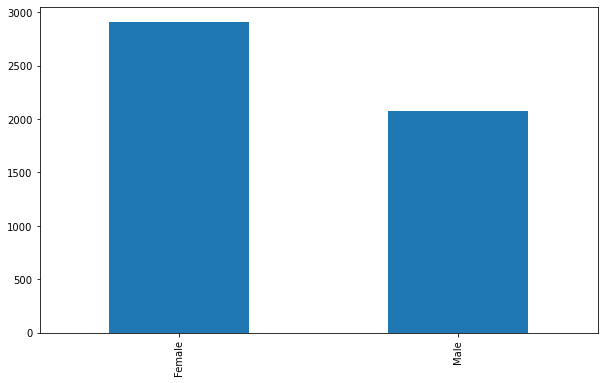

In [9]:
df.gender.value_counts().plot(kind='bar')
plt.show()

In [10]:
df.work_type.value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

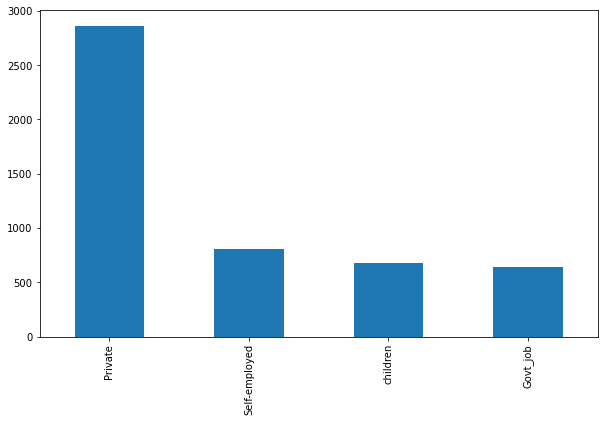

In [11]:
df.work_type.value_counts().plot(kind='bar')
plt.show()

In [12]:
df.smoking_status.value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

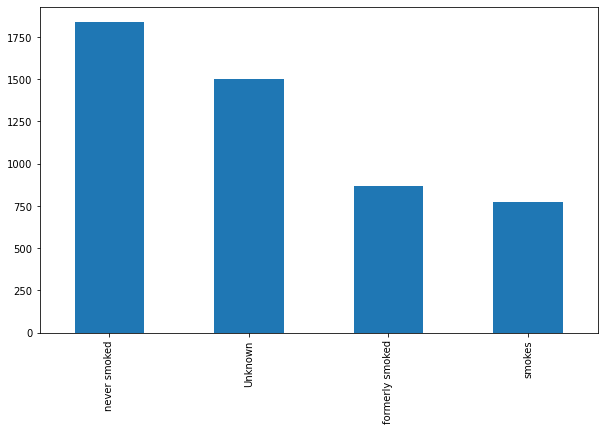

In [13]:
df.smoking_status.value_counts().plot(kind='bar')
plt.show()

In [14]:
df.Residence_type.value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

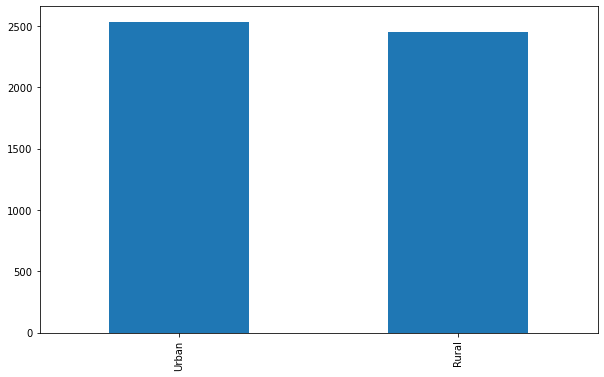

In [15]:
df.Residence_type.value_counts().plot(kind='bar')
plt.show()

In [16]:
df.ever_married.value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

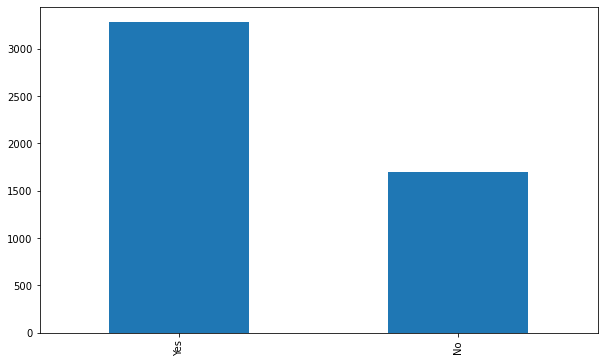

In [17]:
df.ever_married.value_counts().plot(kind='bar')
plt.show()

### Splitting age column 

In [18]:
age_group=[]
for i in df['age']:
    if i<13.0:
        age_group.append('Toddler')
    elif i>12.0 and i<=19.0:
        age_group.append('Teen')
    elif i>19.0 and i<60.0:
        age_group.append('Adult')
    else:
        age_group.append('Senior')
df['age_group']=age_group
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Senior


In [19]:
df.drop('age',axis=1,inplace=True)

### Perfoming one_hot encoding for categorical data

In [20]:
#cat_cols.pop()
df_cod=pd.get_dummies(df,drop_first=True)
df_cod.head()

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,0,1,228.69,36.6,1,1,1,1,0,0,1,1,0,0,1,0,0
1,0,1,105.92,32.5,1,1,1,1,0,0,0,0,1,0,1,0,0
2,0,0,171.23,34.4,1,0,1,1,0,0,1,0,0,1,0,0,0
3,1,0,174.12,24.0,1,0,1,0,1,0,0,0,1,0,1,0,0
4,0,0,186.21,29.0,1,1,1,1,0,0,1,1,0,0,1,0,0


### Detecting and removing outliers

In [21]:
df1 = df_cod.copy()

for i in [i for i in df1.columns]:
    if df1[i].nunique()>=12:
        Q1 = df1[i].quantile(0.20)
        Q3 = df1[i].quantile(0.80)
        IQR = Q3 - Q1
        df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
        df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,0,1,105.92,32.5,1,1,1,1,0,0,0,0,1,0,1,0,0
1,0,0,171.23,34.4,1,0,1,1,0,0,1,0,0,1,0,0,0
2,1,0,174.12,24.0,1,0,1,0,1,0,0,0,1,0,1,0,0
3,0,0,186.21,29.0,1,1,1,1,0,0,1,1,0,0,1,0,0
4,1,1,70.09,27.4,1,1,1,1,0,0,0,0,1,0,1,0,0



Inference: Before removal of outliers, The dataset had 4981 samples.
Inference: After removal of outliers, The dataset now has 4555 samples.


### Checking for balanced data

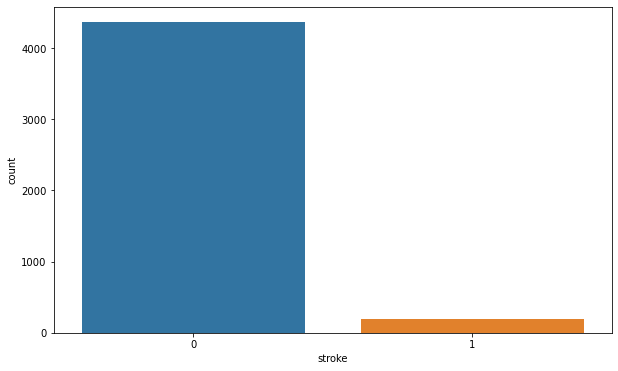

In [22]:
sns.countplot(data=df1,x='stroke')
plt.show()


In [23]:
(df1['stroke']==1).sum()

190

In [24]:
(df1['stroke']==0).sum()

4365

The data is not balanced.We shall perform Random oversampling technique

In [25]:
#columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
 #      'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
  #     'smoking_status', 'stroke']
#df = pd.get_dummies(df[columns])

### Scaling data for the model to assign equal weights to all features

In [26]:
scaler = MinMaxScaler()
dffit= pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
dffit.head()

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,0.0,1.0,0.353465,0.530086,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.807890,0.584527,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.827999,0.286533,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.912121,0.429799,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.104161,0.383954,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Performing resampling for the unbalanced target column

In [27]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=dffit.drop(['stroke'],axis=1)
y=dffit['stroke']
X_over, y_over = oversample.fit_resample(X, y)

In [28]:
df_final=pd.concat([X_over, y_over ],axis=1)

In [29]:
y_over.value_counts()

1.0    4365
0.0    4365
Name: stroke, dtype: int64

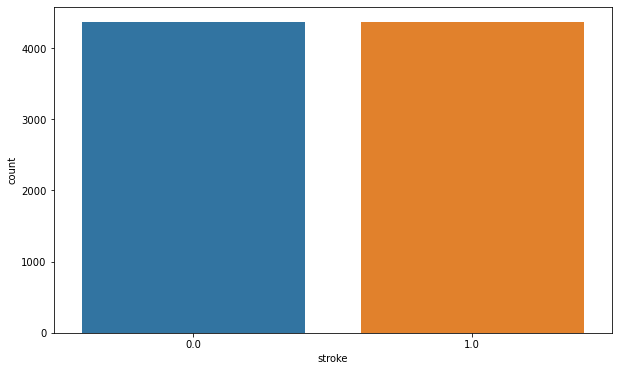

In [30]:
sns.countplot(data=df_final,x='stroke')
plt.show()

Our data is balanced now

In [31]:
df_final=pd.concat([X_over, y_over ],axis=1)

In [32]:
df_final

,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler,stroke
0,0.0,1.0,0.353465,0.530086,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.807890,0.584527,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.827999,0.286533,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.912121,0.429799,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.104161,0.383954,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8725,0.0,1.0,0.624687,0.355301,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8726,0.0,0.0,0.064848,0.888252,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8727,1.0,0.0,0.093515,0.349570,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8728,0.0,0.0,0.122530,0.412607,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### Checking for multicollinearity

In [33]:
cor=df_final.corr()

In [34]:
cor

,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler,stroke
hypertension,1.000000,0.050321,0.079978,0.108929,-0.028224,0.086971,-0.075716,0.183857,-0.129623,-0.042969,0.063176,0.134423,-0.044413,0.246744,-0.090312,-0.117773,0.230511
heart_disease,0.050321,1.000000,0.079574,0.051167,0.135628,0.084190,0.020273,0.032415,-0.088698,-0.023286,0.020649,-0.069045,0.154315,0.287846,-0.063929,-0.080322,0.160586
avg_glucose_level,0.079978,0.079574,1.000000,0.132653,0.092953,0.125856,-0.021489,0.037744,-0.069938,-0.015171,0.059055,-0.021868,0.024433,0.104733,-0.041333,-0.060543,0.141908
bmi,0.108929,0.051167,0.132653,1.000000,0.049244,0.281828,0.140897,0.067588,-0.409402,0.029250,0.088624,0.050808,0.091144,-0.013172,-0.093041,-0.412792,0.096166
gender_Male,-0.028224,0.135628,0.092953,0.049244,1.000000,0.018678,0.072451,-0.037978,0.055985,0.003688,0.067966,-0.152270,0.049409,0.012154,0.010451,0.061603,-0.006526
ever_married_Yes,0.086971,0.084190,0.125856,0.281828,0.018678,1.000000,0.106276,0.142990,-0.514086,-0.055557,0.190437,0.002169,0.097752,0.293744,-0.360389,-0.467085,0.284355
work_type_Private,-0.075716,0.020273,-0.021489,0.140897,0.072451,0.106276,1.000000,-0.607454,-0.337021,-0.009437,0.038605,0.019232,0.091178,-0.087592,0.021376,-0.305290,-0.018014
work_type_Self-employed,0.183857,0.032415,0.037744,0.067588,-0.037978,0.142990,-0.607454,1.000000,-0.158832,-0.007514,0.080626,0.069960,-0.042136,0.294461,-0.090693,-0.143216,0.178718
work_type_children,-0.129623,-0.088698,-0.069938,-0.409402,0.055985,-0.514086,-0.337021,-0.158832,1.000000,-0.001230,-0.148126,-0.175527,-0.128201,-0.274059,0.181396,0.905235,-0.260744
Residence_type_Urban,-0.042969,-0.023286,-0.015171,0.029250,0.003688,-0.055557,-0.009437,-0.007514,-0.001230,1.000000,-0.037749,0.007564,0.008621,0.010541,-0.029168,0.010178,0.006187


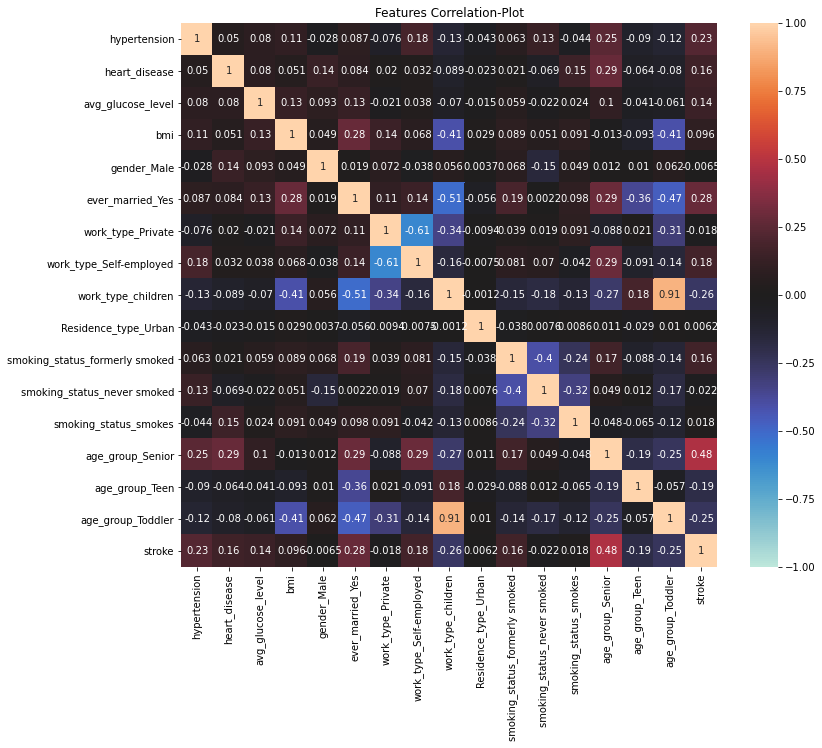

In [35]:
features = df_final.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df_final[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #, 
plt.show()

In [36]:
corr_positive = df_final.corr().abs()

corrUnstack = corr_positive.unstack()
CorrAscend = corrUnstack.sort_values(kind="quicksort")

#print so[-4470:-4460]

In [37]:
CorrAscend.shape

(289,)

In [38]:
CorrAscend.head()

Residence_type_Urban         work_type_children             0.001230
work_type_children           Residence_type_Urban           0.001230
smoking_status_never smoked  ever_married_Yes               0.002169
ever_married_Yes             smoking_status_never smoked    0.002169
gender_Male                  Residence_type_Urban           0.003688
dtype: float64

In [39]:
print (CorrAscend[250:289])

smoking_status_never smoked     smoking_status_smokes             0.324542
smoking_status_smokes           smoking_status_never smoked       0.324542
work_type_Private               work_type_children                0.337021
work_type_children              work_type_Private                 0.337021
age_group_Teen                  ever_married_Yes                  0.360389
ever_married_Yes                age_group_Teen                    0.360389
smoking_status_formerly smoked  smoking_status_never smoked       0.404321
smoking_status_never smoked     smoking_status_formerly smoked    0.404321
work_type_children              bmi                               0.409402
bmi                             work_type_children                0.409402
age_group_Toddler               bmi                               0.412792
bmi                             age_group_Toddler                 0.412792
ever_married_Yes                age_group_Toddler                 0.467085
age_group_Toddler        

Work_type_children and age_group_Toddler are strongly correlated.I will drop one:age_group_Toddler

In [40]:
df_final

,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler,stroke
0,0.0,1.0,0.353465,0.530086,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.807890,0.584527,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.827999,0.286533,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.912121,0.429799,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.104161,0.383954,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8725,0.0,1.0,0.624687,0.355301,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8726,0.0,0.0,0.064848,0.888252,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8727,1.0,0.0,0.093515,0.349570,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8728,0.0,0.0,0.122530,0.412607,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [41]:
df_final.drop('age_group_Toddler',axis=1,inplace=True)

In [42]:
features = list(df_final)[1:] # list containing all but the first column names
print('Features:')
print(', '.join(features))

Features:
heart_disease, avg_glucose_level, bmi, gender_Male, ever_married_Yes, work_type_Private, work_type_Self-employed, work_type_children, Residence_type_Urban, smoking_status_formerly smoked, smoking_status_never smoked, smoking_status_smokes, age_group_Senior, age_group_Teen, stroke


### Feature importance and selection

In [43]:
#dffit.describe()

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [45]:
X= df_final.iloc[:,0:10]  # all features
Y= df_final.iloc[:,-1]  # target output (stroke)

In [46]:
best_features= SelectKBest(score_func=chi2, k=3)
fit= best_features.fit(X,Y)

In [47]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [48]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score',ascending=False)

,Features,Score
8,work_type_children,545.461103
0,hypertension,389.587983
7,work_type_Self-employed,216.778693
1,heart_disease,206.097561
5,ever_married_Yes,176.512143
2,avg_glucose_level,33.079559
3,bmi,5.665639
6,work_type_Private,1.237592
4,gender_Male,0.220101
9,Residence_type_Urban,0.163783


####  Here, we notice that there are top 8 features that are most related to the target output are:
##### 1.hypertension     2.work_type_children     3.heart_disease     4.ever_married_yes 5.work_type_Self-employed 6.avg_glucose_leve 7.bmi 8.Residence_type_Urban

In [49]:
X= df1[['hypertension', 'work_type_children', 'heart_disease','ever_married_Yes','avg_glucose_level','bmi','Residence_type_Urban']]  #the top 3 features
Y= df1[['stroke']] # the target output

### Model Builiding

### Logistic Regression

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [51]:
modelL= LogisticRegression()
modelL.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_pred=modelL.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

      hypertension  work_type_children  heart_disease  ever_married_Yes  \
2774             0                   0              0                 1   
4426             0                   0              0                 1   
3596             0                   0              0                 1   
3967             0                   0              0                 1   
1330             0                   0              0                 1   
...            ...                 ...            ...               ...   
3102             0                   0              0                 1   
376              0                   0              0                 1   
565              0                   0              0                 1   
2849             0                   1              0                 0   
3032             0                   0              0                 1   

      avg_glucose_level   bmi  Residence_type_Urban  
2774              57.77  24.1                

In [53]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision:',metrics.precision_score(y_test, y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.9588364434687157
Recall: 0.0
Precision: 1.0
CL Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1747
           1       1.00      0.00      0.00        75

    accuracy                           0.96      1822
   macro avg       0.98      0.50      0.49      1822
weighted avg       0.96      0.96      0.94      1822



In [54]:
y_pred_proba= modelL.predict_proba(X_test) [::,1]

In [55]:
false_positive_rate, true_positive_rate,_= metrics.roc_curve(y_test, y_pred_proba)

In [56]:
auc= metrics.roc_auc_score(y_test, y_pred_proba)

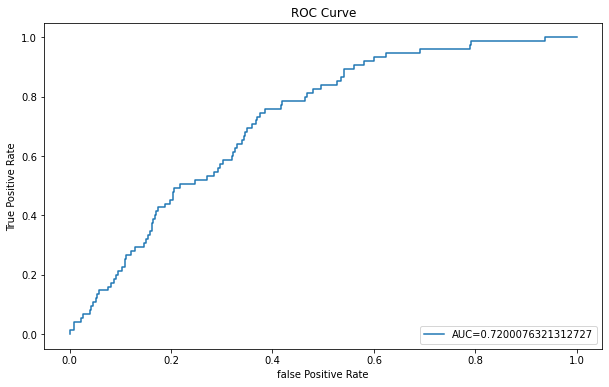

In [57]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)
plt.show()

### GBoost Classifier

In [58]:
GBoost= GradientBoostingClassifier(n_estimators=100, learning_rate=1,
     max_depth=1, random_state=0).fit(X_train, y_train)
GBoost.score(X_test, y_test).round(2)

0.96

In [59]:
y_pre=GBoost.predict(X_test)
print (X_test) #test dataset
print (y_pre) #predicted values

      hypertension  work_type_children  heart_disease  ever_married_Yes  \
2774             0                   0              0                 1   
4426             0                   0              0                 1   
3596             0                   0              0                 1   
3967             0                   0              0                 1   
1330             0                   0              0                 1   
...            ...                 ...            ...               ...   
3102             0                   0              0                 1   
376              0                   0              0                 1   
565              0                   0              0                 1   
2849             0                   1              0                 0   
3032             0                   0              0                 1   

      avg_glucose_level   bmi  Residence_type_Urban  
2774              57.77  24.1                

In [60]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pre))
print('Recall:',metrics.recall_score(y_test, y_pre, zero_division=1))
print('Precision:',metrics.precision_score(y_test, y_pre, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_pre, zero_division=1))

Accuracy: 0.9571899012074643
Recall: 0.0
Precision: 0.0
CL Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1747
           1       0.00      0.00      0.00        75

    accuracy                           0.96      1822
   macro avg       0.48      0.50      0.49      1822
weighted avg       0.92      0.96      0.94      1822



In [61]:
y_pred_proba= GBoost.predict_proba(X_test) [::,1]

In [62]:
false_positive_rate, true_positive_rate,_= metrics.roc_curve(y_test, y_pred_proba)

In [63]:
auc= metrics.roc_auc_score(y_test, y_pred_proba)

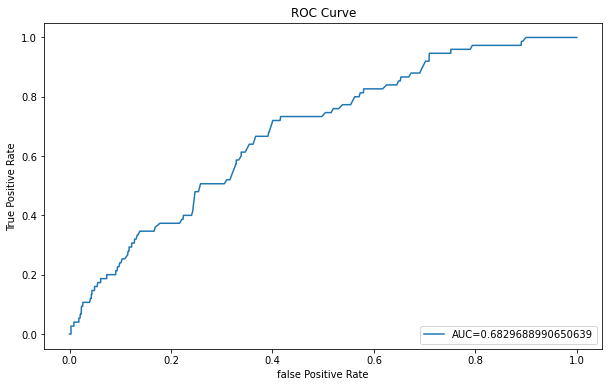

In [64]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)
plt.show()

### Decision Tree

In [65]:
modelT = DecisionTreeClassifier()

In [66]:
modelT.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pre=modelT.predict(X_test)
print (X_test) #test dataset
print (y_pre) #predicted values

      hypertension  work_type_children  heart_disease  ever_married_Yes  \
2774             0                   0              0                 1   
4426             0                   0              0                 1   
3596             0                   0              0                 1   
3967             0                   0              0                 1   
1330             0                   0              0                 1   
...            ...                 ...            ...               ...   
3102             0                   0              0                 1   
376              0                   0              0                 1   
565              0                   0              0                 1   
2849             0                   1              0                 0   
3032             0                   0              0                 1   

      avg_glucose_level   bmi  Residence_type_Urban  
2774              57.77  24.1                

In [68]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pre))
print('Recall:',metrics.recall_score(y_test, y_pre, zero_division=1))
print('Precision:',metrics.precision_score(y_test, y_pre, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_pre, zero_division=1))

Accuracy: 0.9253567508232712
Recall: 0.13333333333333333
Precision: 0.12345679012345678
CL Report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1747
           1       0.12      0.13      0.13        75

    accuracy                           0.93      1822
   macro avg       0.54      0.55      0.54      1822
weighted avg       0.93      0.93      0.93      1822



In [69]:
y_pre_proba= modelT.predict_proba(X_test) [::,1]

In [70]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pre_proba)

In [71]:
auc= metrics.roc_auc_score(y_test, y_pre_proba)

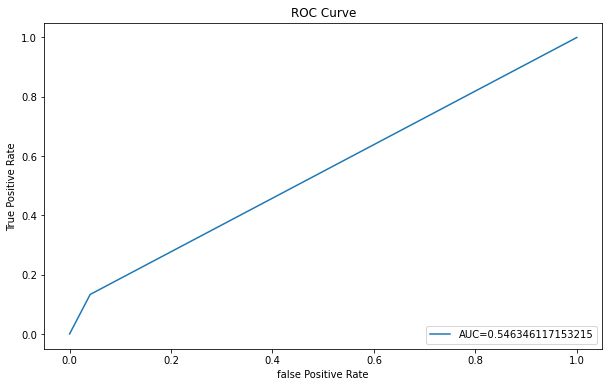

In [72]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)
plt.show()

### Random Forest

In [73]:
modelF = RandomForestClassifier()

In [74]:
modelF.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
y_pre=modelF.predict(X_test)
print (X_test) #test dataset
print (y_pre) 

      hypertension  work_type_children  heart_disease  ever_married_Yes  \
2774             0                   0              0                 1   
4426             0                   0              0                 1   
3596             0                   0              0                 1   
3967             0                   0              0                 1   
1330             0                   0              0                 1   
...            ...                 ...            ...               ...   
3102             0                   0              0                 1   
376              0                   0              0                 1   
565              0                   0              0                 1   
2849             0                   1              0                 0   
3032             0                   0              0                 1   

      avg_glucose_level   bmi  Residence_type_Urban  
2774              57.77  24.1                

In [76]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pre))
print('Recall:',metrics.recall_score(y_test, y_pre, zero_division=1))
print('Precision:',metrics.precision_score(y_test, y_pre, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_pre, zero_division=1))

Accuracy: 0.9560922063666301
Recall: 0.0
Precision: 0.0
CL Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1747
           1       0.00      0.00      0.00        75

    accuracy                           0.96      1822
   macro avg       0.48      0.50      0.49      1822
weighted avg       0.92      0.96      0.94      1822



In [77]:
y_pre_proba= modelF.predict_proba(X_test) [::,1]

In [78]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pre_proba)

In [79]:
auc= metrics.roc_auc_score(y_test, y_pre_proba)

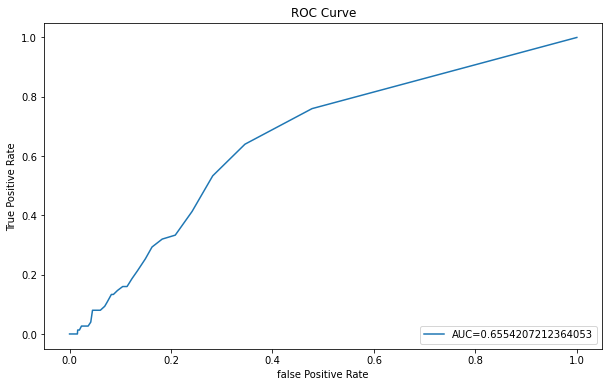

In [80]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)
plt.show()

### Finding good hyper-parameters for Selected models

#### 1.Decision Tree Classifier

In [81]:
modelD = DecisionTreeClassifier() # create model 
modelD.get_params() # display model hyper-parameters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [82]:
modelD.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
%time pred_train = modelD.predict(X_train) # predicted labels for training examples

CPU times: total: 0 ns
Wall time: 0 ns


In [84]:
%time pred_test = modelD.predict(X_test) # predicted labels for test examples

CPU times: total: 15.6 ms
Wall time: 4.45 ms


#### Check for over-fitting

In [85]:
acc_train = accuracy_score(pred_train, y_train)
acc_test = accuracy_score(pred_test, y_test)
print(f'Training accuracy {acc_train: .3f}') # round to 3 decimal places
print(f'Testing accuracy {acc_test: .3f}') # round to 3 decimal places

Training accuracy  1.000
Testing accuracy  0.925


There is some overfitting but not much

#### Finding good hyper-parameters

In [86]:
tuned_parameters = [{'criterion':['gini', 'entropy'],
                     'max_leaf_nodes': range(5,20)}] # hyperparameters to tune

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, 
                   verbose=1, n_jobs=-1) # grid search model
clf.fit(X_train,y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clf.best_params_) # best hyperparameter balues

print("\nGrid scores:")
means = clf.cv_results_['mean_test_score'] # mean accuracy with folds
stds = clf.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations 
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params)) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best parameters found:
{'criterion': 'entropy', 'max_leaf_nodes': 5}

Grid scores:
0.955 (+/-0.006) for {'criterion': 'gini', 'max_leaf_nodes': 5}
0.956 (+/-0.004) for {'criterion': 'gini', 'max_leaf_nodes': 6}
0.956 (+/-0.005) for {'criterion': 'gini', 'max_leaf_nodes': 7}
0.955 (+/-0.009) for {'criterion': 'gini', 'max_leaf_nodes': 8}
0.956 (+/-0.007) for {'criterion': 'gini', 'max_leaf_nodes': 9}
0.956 (+/-0.009) for {'criterion': 'gini', 'max_leaf_nodes': 10}
0.956 (+/-0.009) for {'criterion': 'gini', 'max_leaf_nodes': 11}
0.955 (+/-0.009) for {'criterion': 'gini', 'max_leaf_nodes': 12}
0.954 (+/-0.010) for {'criterion': 'gini', 'max_leaf_nodes': 13}
0.954 (+/-0.010) for {'criterion': 'gini', 'max_leaf_nodes': 14}
0.954 (+/-0.011) for {'criterion': 'gini', 'max_leaf_nodes': 15}
0.954 (+/-0.011) for {'criterion': 'gini', 'max_leaf_nodes': 16}
0.954 (+/-0.011) for {'criterion': 'gini', 'max_leaf_nodes': 17}
0.954 (+/-0.01

#### Evaluating classifier with selected hyper-parameters
Based on our 5-fold-cross-validation, we use a model with the following hyper-parameters:

- criterion = 'entropy'
- max_leaf_nodes = 5, and
- default values for all other hyper-parameters.

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)
Results on test data
Test accuracy =  0.9588
Test precision =  0.0000
Test recall =  0.0000
Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1747
           1       0.00      0.00      0.00        75

    accuracy                           0.96      1822
   macro avg       0.48      0.50      0.49      1822
weighted avg       0.92      0.96      0.94      1822

Confusion matrix (Rows actual, Columns predicted):
      0  1
0  1747  0
1    75  0

ROC curve


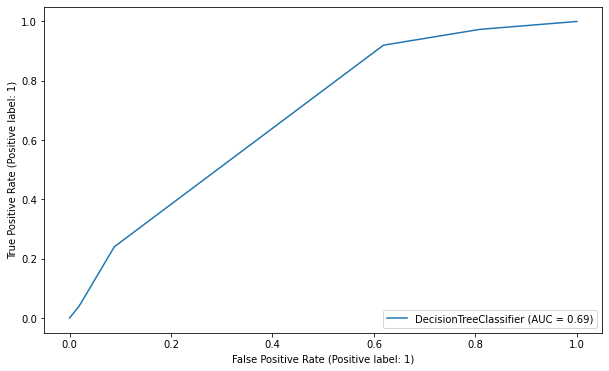

In [87]:
# Specify non-default hyper-parameter values
criterion = 'entropy'
max_leaf_nodes = 5
# Train and test model
good_model = DecisionTreeClassifier(criterion=criterion,
                                    max_leaf_nodes=max_leaf_nodes) # create model 
print(good_model) # display model parameters
good_model.fit(X_train,y_train) # train model
pred = good_model.predict(X_train) # predicted output for test examples
print("Results on test data")
acc = accuracy_score(y_test, y_pred) # accuracy on test examples
prec = precision_score(y_test, y_pred) # precision on test examples
reca = recall_score(y_test, y_pred) # recall on test examples
print(f'Test accuracy = {acc: .4f}') # round to 4 decimal places
print(f'Test precision = {prec: .4f}') # round to 4 decimal places
print(f'Test recall = {reca: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print('\nROC curve')
plot_roc_curve(good_model, X_test, y_test)  # 
plt.show()

#### 2.Random Forest

In [88]:
modelR = RandomForestClassifier() # create model 
modelR.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [89]:
%time modelR.fit(X_train, y_train)

CPU times: total: 578 ms
Wall time: 548 ms


RandomForestClassifier()

In [90]:
%time pred_test = modelR.predict(X_test)

CPU times: total: 93.8 ms
Wall time: 84.5 ms


In [91]:
%time pred_train = modelR.predict(X_train) 

CPU times: total: 78.1 ms
Wall time: 83.7 ms


#### Check for over-fitting

In [92]:
acc_train = accuracy_score(pred_train, y_train)
acc_test = accuracy_score(pred_test, y_test)
print(f'Training accuracy {acc_train: .3f}') # round to 3 decimal places
print(f'Testing accuracy {acc_test: .3f}') # roun

Training accuracy  1.000
Testing accuracy  0.957


There is less overfitting

#### Finding good hyper-parameters
We shall use *k-fold cross-validation* with training data to find good hyper-parameter values for the model.

In this example we shall perform a search over all combinations of:
- 2 different values of *n_estimators*: (25, 50)
- 2 different values of *max_features*: (15, 20), and
- 2 different values of *max_leaf_nodes*: (8, 16)
- default values for all other hyper-parameters.

In [93]:
tuned_parameters = [{'n_estimators': [25, 50],
                     'max_features': [15, 20],
                     'max_leaf_nodes': [8, 16]}] # hyperparameters to tune

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, 
                   verbose=1, n_jobs=-1) # grid search model
clf.fit(X_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clf.best_params_) # best hyperparameter values

print("\nGrid scores:")
means = clf.cv_results_['mean_test_score'] # mean accuracy with folds
stds = clf.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations 
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters found:
{'max_features': 15, 'max_leaf_nodes': 8, 'n_estimators': 25}

Grid scores:
0.958 (+/-0.000) for {'max_features': 15, 'max_leaf_nodes': 8, 'n_estimators': 25}
0.958 (+/-0.000) for {'max_features': 15, 'max_leaf_nodes': 8, 'n_estimators': 50}
0.958 (+/-0.002) for {'max_features': 15, 'max_leaf_nodes': 16, 'n_estimators': 25}
0.958 (+/-0.001) for {'max_features': 15, 'max_leaf_nodes': 16, 'n_estimators': 50}
0.958 (+/-0.001) for {'max_features': 20, 'max_leaf_nodes': 8, 'n_estimators': 25}
0.958 (+/-0.001) for {'max_features': 20, 'max_leaf_nodes': 8, 'n_estimators': 50}
0.958 (+/-0.001) for {'max_features': 20, 'max_leaf_nodes': 16, 'n_estimators': 25}
0.958 (+/-0.001) for {'max_features': 20, 'max_leaf_nodes': 16, 'n_estimators': 50}


#### Evaluating classifier with selected hyper-parameters

Based on our 5-fold-cross-validation, we use a model with the following hyper-parameters:

- max_features = 20
- max_leaf_nodes =8
- n_estimators = 25
- default values for all other hyper-parameters.


RandomForestClassifier(max_features=20, max_leaf_nodes=8, n_estimators=25)
Results on test data
Test accuracy =  0.9588
Test precision =  0.0000
Test recall =  0.0000
Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1747
           1       0.00      0.00      0.00        75

    accuracy                           0.96      1822
   macro avg       0.48      0.50      0.49      1822
weighted avg       0.92      0.96      0.94      1822

Confusion matrix (Rows actual, Columns predicted):
      0  1
0  1747  0
1    75  0

ROC curve


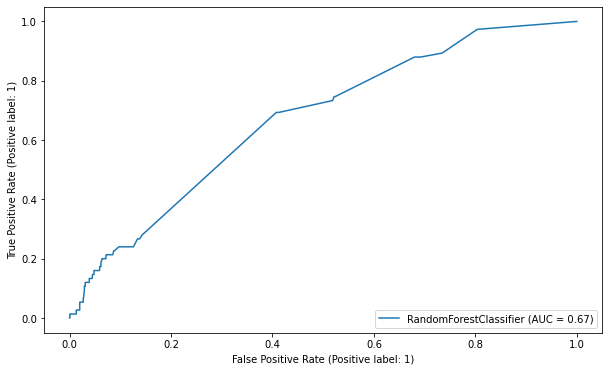

In [94]:
max_features = 20
max_leaf_nodes = 8
n_estimators = 25

good_model = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes,
                                    max_features = max_features, 
                                    n_estimators=n_estimators, )  
print(good_model) # display model parameters
good_model.fit(X_train,y_train) # train model
pred = good_model.predict(X_train) # predicted output for test examples
print("Results on test data")
acc = accuracy_score(y_test,y_pred) # accuracy on test examples
prec = precision_score(y_test, y_pred) # precision on test examples
reca = recall_score(y_test, y_pred) # recall on test examples
print(f'Test accuracy = {acc: .4f}') # round to 4 decimal places
print(f'Test precision = {prec: .4f}') # round to 4 decimal places
print(f'Test recall = {reca: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print('\nROC curve')
plot_roc_curve(good_model,X_test, y_test)  # 
plt.show()

#### 3.Logistic Regression

In [95]:
modelL = LogisticRegression() # create model 
modelL.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Check for over-fitting

In [96]:
acc_train = accuracy_score(pred_train, y_train)
acc_test = accuracy_score(pred_test, y_test)
print(f'Training accuracy {acc_train: .3f}') # round to 3 decimal places
print(f'Testing accuracy {acc_test: .3f}') # round to 3 decimal places

Training accuracy  1.000
Testing accuracy  0.957


There is less overfitting

#### Finding good hyper-parameters

In [97]:
tuned_parameters = [{'C': [10.0, 100.0, 1000.0],
                     'max_iter': [500]}] # hyperparameters to tune


clf = GridSearchCV(LogisticRegression(), tuned_parameters, 
                   verbose=1, n_jobs=-1) # grid search model
clf.fit(X_train,y_train) # evaluate hyper-parameters
print("\nBest parameters found:")
print(clf.best_params_) # best hyperparameter values

print("\nGrid scores:")
means = clf.cv_results_['mean_test_score'] # mean accuracy with folds
stds = clf.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations 
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params)) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best parameters found:
{'C': 10.0, 'max_iter': 500}

Grid scores:
0.958 (+/-0.000) for {'C': 10.0, 'max_iter': 500}
0.958 (+/-0.000) for {'C': 100.0, 'max_iter': 500}
0.958 (+/-0.000) for {'C': 1000.0, 'max_iter': 500}


#### Evaluating classifier with selected hyper-parameters
Based on our 5-fold-cross-validation, we use a model with the following hyper-parameters:
- C = 10
- max_iter = 500 
- default values for all other hyper-parameters.


LogisticRegression(C=10, max_iter=500)
Results on test data
Test accuracy =  0.9588
Test precision =  0.0000
Test recall =  0.0000
Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1747
           1       0.00      0.00      0.00        75

    accuracy                           0.96      1822
   macro avg       0.48      0.50      0.49      1822
weighted avg       0.92      0.96      0.94      1822

Confusion matrix (Rows actual, Columns predicted):
      0  1
0  1747  0
1    75  0

ROC curve


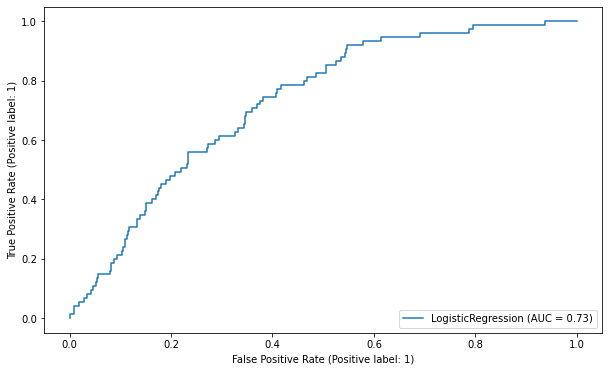

In [98]:
C = 10
max_iter = 500
# Train and test model
good_model = LogisticRegression(C = C, max_iter=max_iter) # create model 
print(good_model) # display model parameters
good_model.fit(X_train,y_train) # train model
pred = good_model.predict(X_train) # predicted output for test examples
print("Results on test data")
acc = accuracy_score(y_test,y_pred) # accuracy on test examples
prec = precision_score(y_test, y_pred) # precision on test examples
reca = recall_score(y_test, y_pred) # recall on test examples
print(f'Test accuracy = {acc: .4f}') # round to 4 decimal places
print(f'Test precision = {prec: .4f}') # round to 4 decimal places
print(f'Test recall = {reca: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print('\nROC curve')
plot_roc_curve(good_model, X_test, y_test)  # 
plt.show()

### Model Explainability using SHAP

#### Random Forest

In [99]:
my_model = RandomForestClassifier(random_state=0).fit(X_train,y_train)

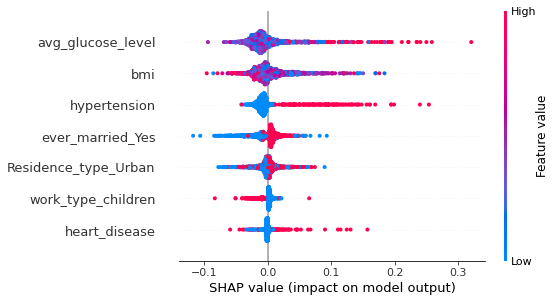

In [100]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values( X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1],  X_test)

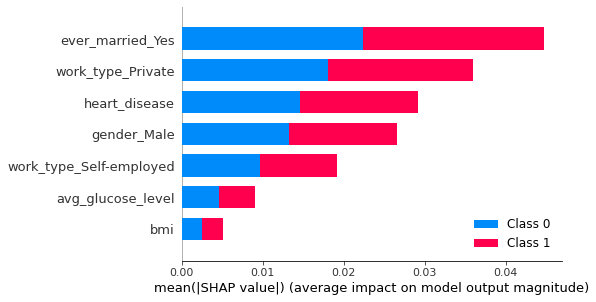

In [101]:
shap.summary_plot(shap_values, X_train, feature_names=features, plot_type="bar")

#### Logistic regression.

### Pickling the model and reloading for Prediction

In [102]:
import pickle
pickle.dump(good_model, open("model.pkl", "wb"))

In [103]:
saved_model_file = 'Machine Learning Fundamentals.sav' 
pickle.dump(good_model, open(saved_model_file, 'wb')) 

In [104]:
loaded_model = pickle.load(open(saved_model_file, 'rb')) 

pred = loaded_model.predict(X_test)
acc = accuracy_score(y_test, pred) 
print(f'Test accuracy = {acc: .4f}') 

Test accuracy =  0.9588


#### Thank You!